# Regresión Lineal: Ensayo

#### *Nombre*: Daniela Lucía Ramos Betin

##### Escriba un ensayo sobre el tema Regresión Lineal, en un cuaderno de Jupyter.

    Debe incluir:

> 1. Introducción.
> 2. Breve historia.
> 3. El planteamiento del algortimo.
> 4. Desarrollar un ejemplo de regresión lineal, con datos reales.
> 5. Conclusiones.

> <i style="color:#3F51B5">El cuaderno debe incluir: títulos, enlaces (por ejemplo a Wikipedia), imágenes locales, imágenes de internet, el plantemiento matemático del problema, y su implementación en Ptyhon. Incluya gŕaficas hechas en Matplotlib. Además debe usar como mínimo: Numpy (para manejo de arreglos) y Pandas para lectura de datos. Esta tarea es para entregar en su github personal, en cual colocará el cuaderno de Jupyer Lab y la renderización con nbview y html.<i/>

#### 1. Introducción

Para entender el concepto de <b style="color:#3F51B5">Regresion Lineal</b> debemos partir de la idea de *¿Qué es una regresión?*

> La palabra *regresión* viene del latín *regressio* y significa "acción de volver hacia atrás". Sus componentes léxicos son: el prefijo re- (iteración, repetición) y gradior, gressus (ir, marchar) [1]("http://etimologias.dechile.net/?regresio.n#:~:text=La%20palabra%20%22regresi%C3%B3n%22%20viene%20del,regresividad%2C%20progreso%20y%20tambi%C3%A9n%20egresar.")

En nuestro contexto, esa *"acción de volver hacia atrás"* significaria matemáticamente descifrar, analizar o descubir *que relación* tiene una variable dependiente $\vec{Y}$, con una o más variables $\vec{X}=(x_1,x_2..)$ que pueden ser o no independientes entre sí. Esta relación puede tener cualquier forma, y allí es donde se entra a descubrir como se relacionan con el fin de <i style="color:#3F51B5">modelar</i> y en últimas poder <i style="color:#3F51B5">predecir</i> como se comportará ese parámetro dependiente.

##### 1.1 Modelo Lineal: Modelo más simple a intentar para realizar regresiones

Si la relación buscada (mencionada anteriormente) es de la forma:

$$\boxed{\;\hat{Y}=\textbf{w}\vec{X} + w_0 + \epsilon \;} \; \; \small(1)$$

En donde se asumen las siguientes condiciones: [2]("https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html#:~:text=There%20are%20four%20assumptions%20associated,are%20independent%20of%20each%20other.")

>  <p> 1. Linealidad: Las relaciones entre las X y el promedio (valor esperado) de Y es lineal.</p>
   <p> 2. Homoscedasticidad: La varianza de los residuos es la misma para cualquier X.</p>
   <p> 3. Independencia: Las variables se asumen linealmente independientes. (Corr 0 entre ellas)</p>
   <p> 4. Normalidad: Para cada valor fijo de X, Y tiene distribución normal.</p>

En el caso de la ecuación (1), **w** contiene los pesos, o los parámetros para cada variable de la combinación lineal, mientras que $w_0$ es el intercepto con el eje $\vec{Y}$ cuando $\vec{X}$ es el vector $\vec{0}.\epsilon$ es el error aleatoreo ya que los datos en la vida real difieren del modelo. Es importante destacar que el valor del error $\epsilon \sim \mathcal{N}(0,\sigma^2)$.

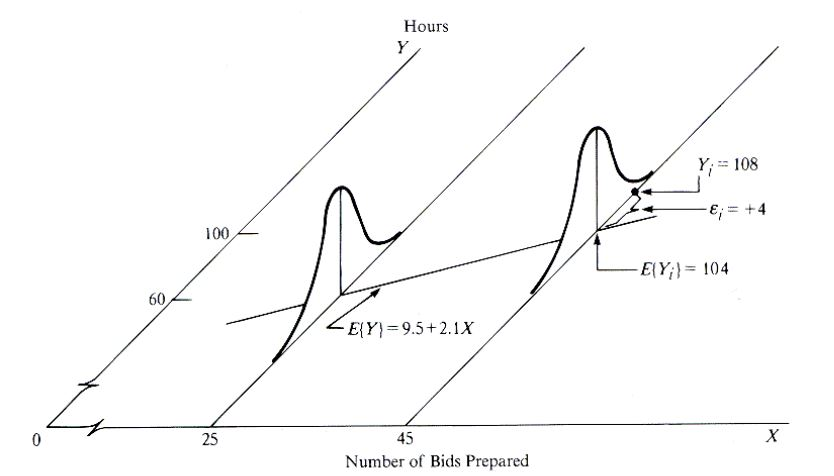
> <p>Imagen 1: Representación gráfica de una regresion lineal.</p>

Si tenemos un predictor, se llama <i style="color:#3F51B5">regresión lineal simple</i>. Si tenemos varios se llama <i style="color:#3F51B5">regresión lineal multiple.</i>

#### 2. Breve Historia

Las primeras nociones de correlación y regresión provienen, en gran parte, de estudios realizados por Adolphe Quetelet en las áreas de <i style="color:#3F51B5">Biología y Biometría </i>. Estas se originan desde sus análisis sobre la estatura del hombre, estimando empíricamente las medias y desviaciones típicas de estas medidas,
las cuales dependian de varias <i style="color:#3F51B5">variables independientes</i> tales como el sexo, edad, profesión o nivel de
educación. En un principio se relacionan dos o más variables, por ejemplo se llega a obtener una ecuación de
una hipérbola que relaciona la edad y la altura de las personas entre 0 y 30 años. Mientras que el mayor logro radica en haber
considerado la dispersión del modelo y descubierto que la <i style="color:#3F51B5">ley normal</i> ofrecía una
descripción aceptable de tal variabilidad, por lo que se utilizó esta distribución como ajuste a tales medidas
antropométricas. [3]("https://core.ac.uk/download/pdf/20343739.pdf")

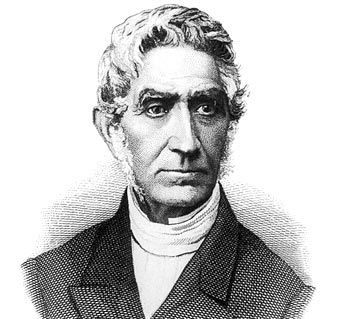

> Imagen 2: Adolphe Quetelet - Pionero en Medidas Antropométricas

#### 3. Planteamiento del Algoritmo

Antes de plantear las condiciones del modelo y los datos a utilizar, es importante saber que módulos de *pyhton* utilizaremos.

##### Librerias a Utilizar:

In [49]:
import numpy as np               #Manejo de Arrays
from numpy import *
import pandas as pd              #Crear/Manejar Dataframes
import seaborn as sns            #Otra libreria para Plotting
import matplotlib.pyplot as plt  #Plotting
%matplotlib inline             
from sklearn import linear_model #Libreria scikitlearn: Libreria para DS que incluye modelos, módulos que generan train/test data...
from sklearn.metrics import mean_squared_error, r2_score #Modulo de métricas para Errores.
#import jax                       #Para implementar el método de gradiente descendente.
from jax import grad,jit         #Para calcular el gradiente 
from statsmodels.api import OLS  #Para obtener un resumen de la regresión.
import statsmodels.api as sm

>El algoritmo a implementar debe contener como primer paso la creación de los datos mediante la ecuación (1) y darles el formato adecuado para los datos (mediante numpy),  crear el modelo "vacio" con  <i style="color:#3F51B5">sckitlearn</i>, ajustarlo linealmente e implementar las métricas (la función de pérdida).
También podemos fittear el modelo mediante el  <i style="color:#3F51B5">algoritmo de descenso de gradiente</i>, que tambien se hará en este trabajo y se podrán comparar los resultados.

##### 3.1 Ajuste mediante Scikitlearn

###### Crear datos con numpy

In [2]:
#Funcion para crear datos aleatorios con tendencia lineal. Con los parámetros de w,w0 y desviación estandar.
np.random.seed(42)

def Datos_Creados(w,w0,sigma):
    x=np.linspace(1,10,100)
    y= []
    for i in x:
        epsilon = np.random.normal(0,sigma)
        y.append((w*i) + w0 + epsilon)
    return x,y

In [3]:
#Se generan 100 datos aleatorios. con w=1.5, w0=20, y ds=1.

datos_aleatorios= [Datos_Creados(1.5,20,1) for i in range(100)] 

In [4]:
x_train= datos_aleatorios[0][0]

In [5]:
y_train= np.array(datos_aleatorios[0][1])

##### Los datos anteriores como son una tupla se separan en los datos para x e y

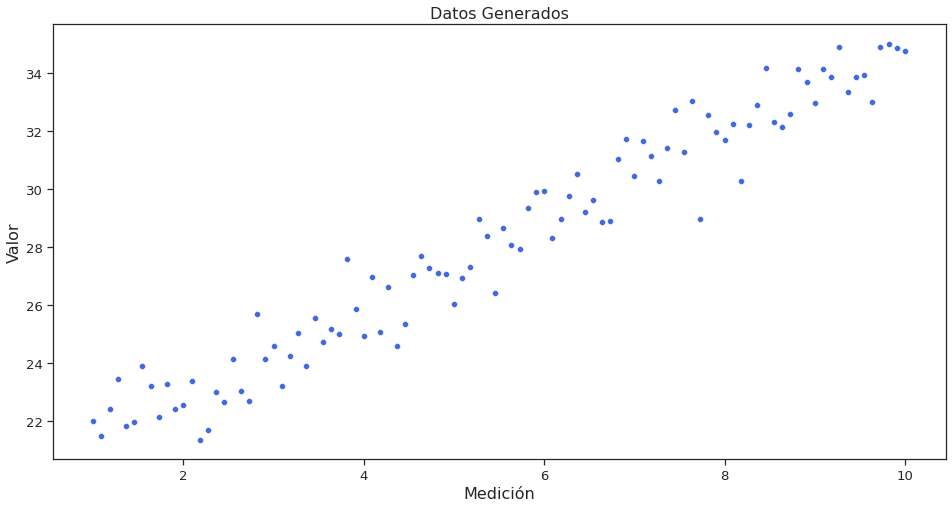

In [6]:
plt.figure(figsize=(16,8))
sns.set_theme(style="ticks")
sns.set_context("notebook",font_scale=1.2)
sns.scatterplot(x=x_train,y=y_train,color="royalblue")
plt.title("Datos Generados",fontsize=16)
plt.xlabel("Medición",fontsize=16)
plt.ylabel("Valor",fontsize=16)
plt.show()

##### Se formatean con numpy para tener arrays

In [7]:
x_train,y_train= np.array(x_train),np.array(y_train)

In [8]:
#Mediante el Uso de pandas podemos apreciar el conjunto de datos númericamente.

datos_pandas=pd.DataFrame(y_train,x_train).reset_index().rename(columns={0:"Valor","index":"Medicion"})
datos_pandas

,Medicion,Valor
0,1.000000,21.996714
1,1.090909,21.498099
2,1.181818,22.420416
3,1.272727,23.432121
4,1.363636,21.811301
...,...,...
95,9.636364,32.991031
96,9.727273,34.887029
97,9.818182,34.988328
98,9.909091,34.868750


In [9]:
datos_pandas.describe()

,Medicion,Valor
count,100.000000,100.000000
mean,5.500000,28.146153
std,2.637408,4.098221
min,1.000000,21.359447
25%,3.250000,24.581220
50%,5.500000,28.183305
75%,7.750000,31.777578
max,10.000000,34.988328


##### Incializar el modelo lineal

In [10]:
modelo = linear_model.LinearRegression()

In [11]:
type(modelo)

sklearn.linear_model._base.LinearRegression

##### Entrenar el modelo (<i style="color:#3F51B5">fitting</i>)

In [12]:
modelo.fit(x_train.reshape(-1,1),y_train.reshape(-1,1));

In [13]:
y_pred=modelo.predict(x_train.reshape(-1,1));

In [14]:
print('w_1:', modelo.coef_[0][0],"-","w_0:",modelo.intercept_[0],"-","ECM:",mean_squared_error(y_train,y_pred),"-","R2:",r2_score(y_train,y_pred))

w_1: 1.5153258525962852 - w_0: 19.811861293326338 - ECM: 0.8149047134980776 - R2: 0.9509904228220943


Los valores obtenidos del ajuste fueron de $w_1\approx 1.5$, $w_0 \approx 19.81$, $ECM \approx 0.814$, $R^2 \approx 0.95$

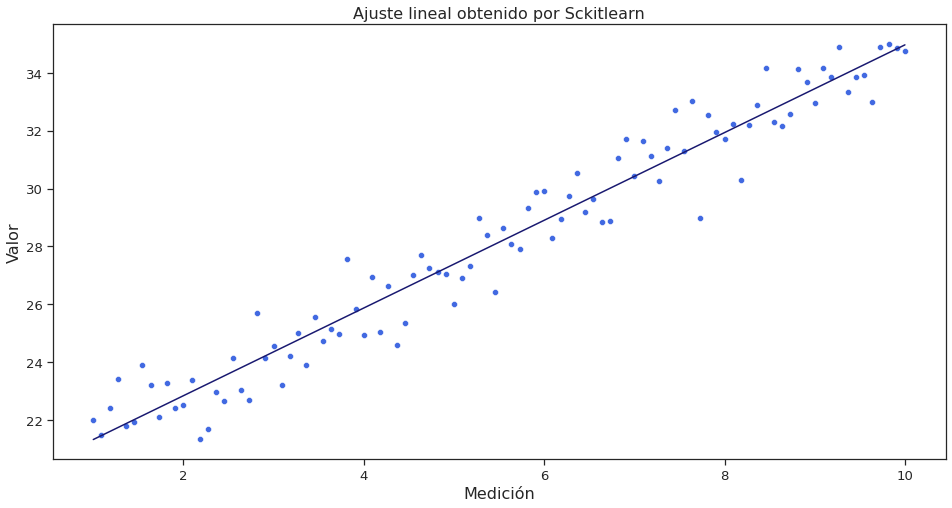

In [15]:
plt.figure(figsize=(16,8))
sns.set_theme(style="ticks")
sns.set_context("notebook",font_scale=1.2)
sns.scatterplot(x=x_train,y=y_train,color="royalblue")
plt.plot(x_train,y_pred,color="midnightblue")
plt.title("Ajuste lineal obtenido por Sckitlearn",fontsize=16)
plt.xlabel("Medición",fontsize=16)
plt.ylabel("Valor",fontsize=16)
plt.show()

El valor para $R^2$ nos indica que el modelo explica 99% mejor la varianza de los datos que un modelo con recta constante $y=0$.

##### 3.2 Teoría y Ajuste: Algoritmo de Descenso de Gradiente

La teoria de <i>descenso de gradiente</i>, tiene como finalidad hacer un proceso de optimización sobre la función de perdida $\mathcal{L}$. En el caso de un ajuste lineal, se trata de optimizar el error medio cuadrático, o $EMC$.

$$\mathcal{L}_{oss}=\frac{1}{N}\sum_i(\hat{y} (w_i)- y_i)^2 \leadsto \boxed{\frac{\partial \mathcal{L}}{ \partial w_i} = 0} \; \; (2)$$  

$$w_1=w_1 - l_r \frac{\partial \mathcal{L}(w_0,w_1)}{ \partial w_1} \; \; y \; \; w_0=w_0 - l_r \frac{\partial \mathcal{L}(w_0,w_1)}{ \partial w_0}  $$

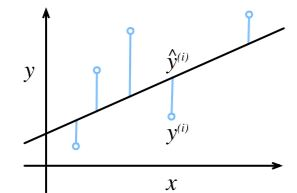

> Imagen 3: Calculo de la función de perdida ECM para el ajuste lineal.

Para este proceso, se implementa un <i style="color:#3F51B5">hiperparámetro</i> llamado learning rate, taza de aprendizaje, o $l_r$, para regular los cambios de derivadas extremas.Este valor por defecto es de 0.01. Entonces la idea es ir ajustando los pesos $w_i$ hasta que se alcance el mínimo valor de la derivada de la función de perdida.

![Metodo de Gradiente Descendente](https://jretamales.github.io/assets/images_files/2018-10-21-introduccion-amable-a-gradiente-descendente_33_0.png)

> Imagen 4: Proceso de gradiente Descendente. Ref: [3](https://jretamales.github.io/assets/images_files/2018-10-21-introduccion-amable-a-gradiente-descendente_33_0.png)

##### 3.3 Manejo de Pandas: Guardar y Re-importar los datos.

In [16]:
#Para importar los datos de la sección anterior como CSV y comparar.

datos_pandas.to_csv('Ejemplo_Cargado_Datos.csv')

In [17]:
datos_gradiente=pd.read_csv('Ejemplo_Cargado_Datos.csv').drop(columns="Unnamed: 0")

In [18]:
datos_gradiente.head().append(datos_gradiente.tail())

,Medicion,Valor
0,1.000000,21.996714
1,1.090909,21.498099
2,1.181818,22.420416
3,1.272727,23.432121
4,1.363636,21.811301
95,9.636364,32.991031
96,9.727273,34.887029
97,9.818182,34.988328
98,9.909091,34.868750
99,10.000000,34.765413


In [19]:
x_train= np.array(datos_gradiente.Medicion)

In [20]:
y_train= np.array(datos_gradiente.Valor)

In [21]:
#Se necesita convertir las componentes del array en datos tipo punto flotante (32) para que se pueda implementar el modelo más adelante.

x_train,y_train=float32(x_train),float32(y_train) 

##### 3.4 Gradiente Descendiente: Algoritmo

In [22]:
def funcion_perdida(w0,w1,x,y):
    return ((y-(w0+w1*x))**2).mean()

#Valor teórico de la funcion de pérdida con los parámetros w_0=20,w_1=1.5

funcion_perdida(20,1.5,x_train,y_train) 

0.8273064

In [23]:
#Tomado de la clase - Modulo jit,grad de Jax.

#Se define la función de perdida para calcularle el gradiente.

gradient=jit(grad(funcion_perdida,argnums=(0,1)))

#Se crea la función de optimización que re-calcula el gradiente dentro del ciclo del algoritmo de gradiente descendente.

def optimizar(w0,w1,x,y,lr=0.01):
    #print(w0,w1)
    # Calcular y guardar la respectiva derivada parcial para w_0 y w_1
    w0_gradient,w1_gradient=gradient(w0,w1,x,y)
    #print(w0_gradient,w1_gradient)
    #Metodo de gradiente descendente, para buscar el w_i tal que el error sea un minímo (ajuste).
    w0 -= w0_gradient*lr
    w1 -= w1_gradient*lr
    return w0,w1

In [24]:
TF_CPP_MIN_LOG_LEVEL=0          #El código pide igualar este parámetro a 0.
epochs=1400                     #Numero de veces que se repetira el ciclo de optimización.
W0,W1,train_loss = [],[],[]     #Crear tres listas vacias para que se guarden los valores que se van obteniendo en la optimización.

#------------------------------ Inicialización de los parámetros.
w0,w1 = 5.,5.
#-------------------------------Proceso de Gradiente Descendente.

for i in range(epochs):
    w0,w1=optimizar(w0,w1,x_train,y_train)
    W0.append(w0)
    W1.append(w1)
    train_loss.append(funcion_perdida(w0,w1,x_train,y_train))
    #Para que se imprima cada 20 iteraciones el valor que toma la función de pérdida.
    if i%200==0:   
        print(" Valor de la función de pérdida en la iteración #",i,":",funcion_perdida(w0,w1,x_train,y_train))

 Valor de la función de pérdida en la iteración # 0 : 45.76212
 Valor de la función de pérdida en la iteración # 200 : 10.489749
 Valor de la función de pérdida en la iteración # 400 : 3.0750017
 Valor de la función de pérdida en la iteración # 600 : 1.3428725
 Valor de la función de pérdida en la iteración # 800 : 0.938239
 Valor de la función de pérdida en la iteración # 1000 : 0.84371656
 Valor de la función de pérdida en la iteración # 1200 : 0.8216345


Ahora se proceden a imprimir el ultimo valor de cada vector de parametros $w_i$ respectivamente.

In [25]:
W0[-1],W1[-1]

(DeviceArray(19.719448, dtype=float32), DeviceArray(1.5290796, dtype=float32))

Se pueden observar que los valores para $w_0 \approx 19.7$, y $w_1 \approx 1.53$ que son muy acertados con respecto a los parámetros con los que se generaron los datos.

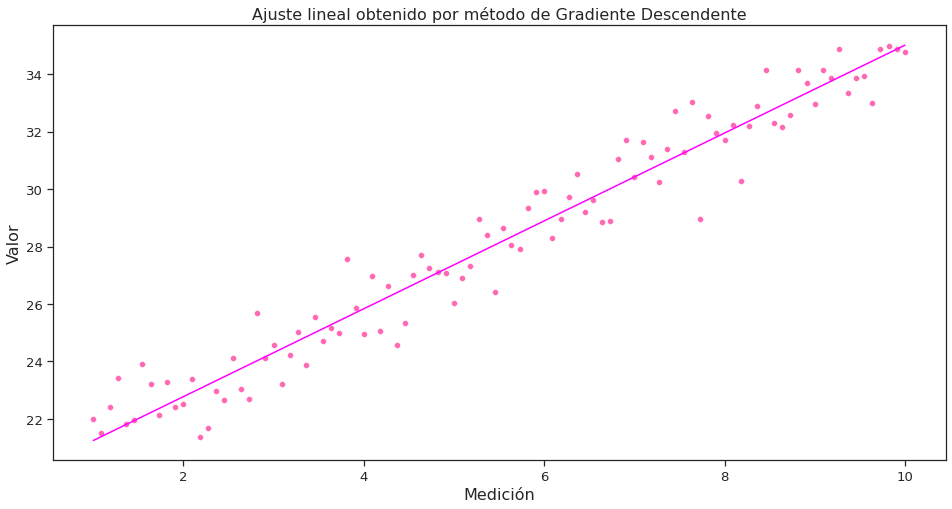

In [26]:
plt.figure(figsize=(16,8))
sns.set_theme(style="ticks")
sns.set_context("notebook",font_scale=1.2)
sns.scatterplot(x=x_train,y=y_train,color="hotpink")
plt.plot(x_train,(1.5290796*x_train) + 19.719,color="magenta")
plt.title("Ajuste lineal obtenido por método de Gradiente Descendente",fontsize=16)
plt.xlabel("Medición",fontsize=16)
plt.ylabel("Valor",fontsize=16)
plt.show()

##### 3.5 Una aplicación a datos reales: Boston Dataset - Scikitlearn

>Este dataset muestra las variables relacionadas con el precio de las casas en Boston.

In [27]:
from sklearn.datasets import load_boston

In [28]:
boston = load_boston()
x_train = pd.DataFrame(boston.data, columns=boston.feature_names)
y_train = pd.Series(boston.target)
x_train["PRICE"] = boston.target

In [29]:
x_train.head(10);

In [30]:
#Se mira la matriz de correlaciones a ver cual variable tiene una tendencia lineal para aplicar el ejemplo.
x_train.corr();

<AxesSubplot:>

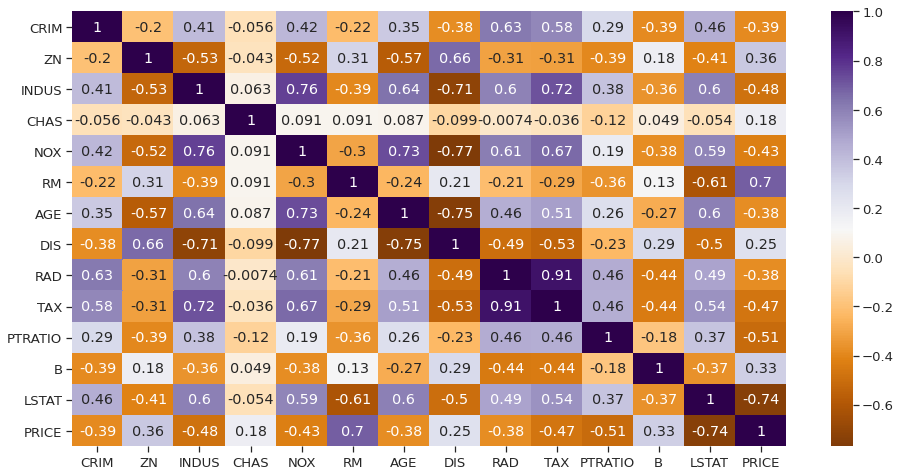

In [31]:
#Aqui es mas fácil visualizar que parámetro podemos relacionar con el precio de las casas en boston.
plt.figure(figsize=(16,8))
sns.heatmap(x_train.corr(), annot = True, cmap="PuOr")

> <i> En este caso, nos seria funcional elegir la variable RM: average number of rooms per dwelling , o la variable LSTAT: lower status of the population. </i>

En este caso, elegiremos LSTAT, ya que la variable RM fue analizada anteriormente vs el precio.

In [32]:
dataframe_interes=x_train[["LSTAT","PRICE"]]

In [33]:
dataframe_interes.head()

,LSTAT,PRICE
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


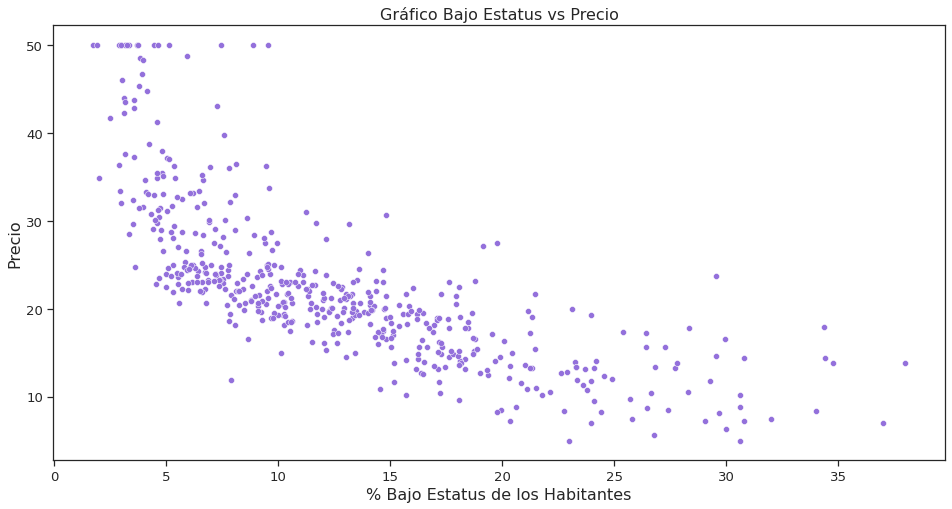

In [34]:
plt.figure(figsize=(16,8))
sns.set_theme(style="ticks")
sns.set_context("notebook",font_scale=1.2)
sns.scatterplot(x=dataframe_interes.LSTAT,y=dataframe_interes.PRICE,color="mediumpurple")
plt.title("Gráfico Bajo Estatus vs Precio",fontsize=16)
plt.xlabel("% Bajo Estatus de los Habitantes",fontsize=16)
plt.ylabel("Precio",fontsize=16)
plt.show()

In [35]:
modelo2 = linear_model.LinearRegression()

In [36]:
modelo2.fit(np.array(dataframe_interes.LSTAT).reshape(-1,1),np.array(dataframe_interes.PRICE).reshape(-1,1));

In [37]:
y_pred=modelo2.predict(np.array(dataframe_interes.LSTAT).reshape(-1,1));

In [38]:
print('w_1:', modelo2.coef_[0][0],"-","w_0:",modelo2.intercept_[0],"-","ECM:",mean_squared_error(np.array(dataframe_interes.PRICE).reshape(-1,1),y_pred),"-","R2:",r2_score(np.array(dataframe_interes.PRICE).reshape(-1,1),y_pred))

w_1: -0.9500493537579906 - w_0: 34.5538408793831 - ECM: 38.48296722989415 - R2: 0.5441462975864797


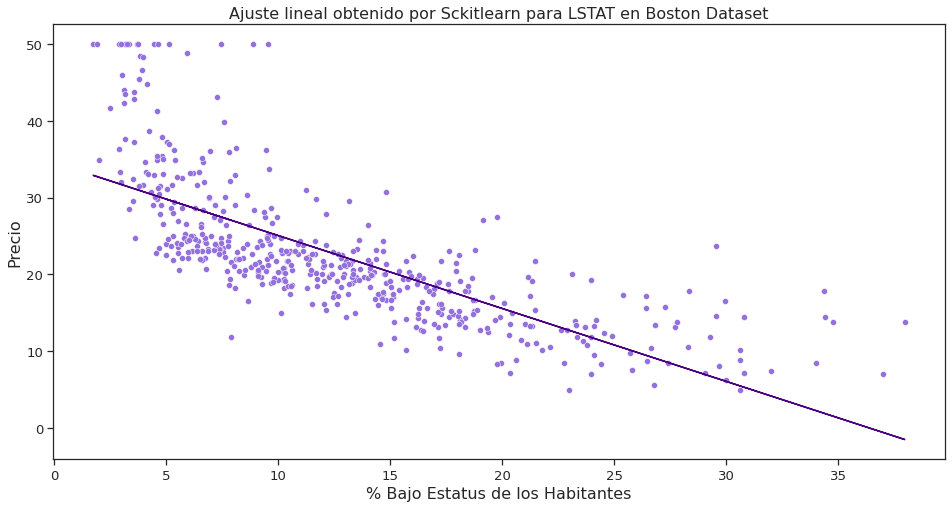

In [40]:
plt.figure(figsize=(16,8))
sns.set_theme(style="ticks")
sns.set_context("notebook",font_scale=1.2)
sns.scatterplot(x=dataframe_interes.LSTAT,y=dataframe_interes.PRICE,color="mediumpurple")
plt.plot(np.array(dataframe_interes.LSTAT).reshape(-1,1),y_pred,color="indigo")
plt.title("Ajuste lineal obtenido por Sckitlearn para LSTAT en Boston Dataset",fontsize=16)
plt.xlabel("% Bajo Estatus de los Habitantes",fontsize=16)
plt.ylabel("Precio",fontsize=16)
plt.show()

Los valores obtenidos del ajuste fueron de $w_1\approx -0.95$, $w_0 \approx 34.55$, $ECM \approx 38.48$, $R^2 \approx 0.54$. En este caso el modelo no tuvo uniformidad en la varianza ya que existen varios outliers o <i>datos atípicos</i> que alteran la tendencia, luego se tendría que analizar si existe un mejor modelo de diferente orden, o realizar alguna prueba de hipotesis con el <i>p valor</i>. Mientras tanto, visualmente se puede decir que el precio de las casas tiende a descender cuando el porcentaje de la población que habita el sector en su mayoria es de bajo estatus.

#### 4. Conclusiones

> Se puede apreciar que la libreria scikitlearn proporciona mejor acercamiento al cálculo de los parámetros y las métricas de calidad del modelo, mientras que el método de gradiente descendente posee limitaciones a nivel de memoria, y de rango de datos.

> Se pudo comprobar que si se generan con numpy datos pseudoaleatorios con parámetros exactos $(w_0,w_1)$ y se les agrega un error $\epsilon$ con distribución normal, la regresión lineal y los modelos calculados anteriormente explican adecuadamente la varianza de los datos.

> Las herramientas de pandas y seaborn son realmente utiles para la visualización y comprensión de la información.